In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import time
from shapely.geometry import Point, LineString
from datetime import date
from centroid import centroids, create_arc
import matplotlib.pyplot as plt

In [2]:
today_date = date.today()
iso_today_date = today_date.isoformat()
print(f'Today is {iso_today_date}!')

Today is 2024-10-29!


In [3]:
cfxls = '/Users/gem-tah/GEM_INFO/GEM_WORK/earthrise-maps/testing/source/Global Coal Project Finance Tracker_October 2024_GEM.xlsx'

In [4]:
df = pd.read_excel(
cfxls,
sheet_name = 'Data',
skiprows=1  # Skip the header row
)

In [5]:
set(df['Type of Finance'].to_list())
df['Type of Finance'] = df['Type of Finance'].fillna('Not found')

df['Type of Finance'] = df['Type of Finance'].apply(lambda x: x.strip())
set(df['Type of Finance'].to_list())


{'Not found',
 'bond',
 'equity',
 'government grant',
 'grant',
 'insurance',
 'loan',
 'reFinancing bond',
 'reFinancing loan',
 'retirement reFinancing loan'}

In [6]:
set(df['Financier Type'].to_list())
df['Financier Type'] = df['Financier Type'].replace('Unknown', 'Not found').replace('Government-owned policy institution','Governmental policy institution')
df['Financier Type'] = df['Financier Type'].fillna('Not found')

In [7]:
set(df['Financier Type'].to_list())


{'Government-owned commercial institution',
 'Governmental policy institution',
 'Not found',
 'Privately-owned commercial institution'}

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4699 entries, 0 to 4698
Data columns (total 62 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Financier                                                           4393 non-null   object 
 1   Financier Public or Private                                         4396 non-null   object 
 2   Financier Type                                                      4699 non-null   object 
 3   Domestic/International                                              4555 non-null   object 
 4   Financier Country                                                   4409 non-null   object 
 5   Advisor                                                             1490 non-null   object 
 6   Type of Finance                                                     4699 non-null   object 
 7   Equity Partners

In [9]:
pv_3test = df.pivot_table(
    values="Capacity (MW)",
    index='Financier Country',
    columns='Financing Status',
    aggfunc='sum',
    fill_value='not found'
)
pv_3test

Financing Status,Closed,Financing,Financing,Stopped,Unknown,stopped
Financier Country,,,,,,
Australia,5141.0,not found,not found,not found,not found,not found
Austria,1950.0,not found,not found,660.0,not found,not found
Bahamas,300.0,not found,not found,not found,not found,not found
Bangladesh,2915.0,2100.0,not found,not found,not found,not found
Barbados,300.0,not found,not found,not found,not found,not found
...,...,...,...,...,...,...
United States,39088.4,300.0,not found,1200.0,not found,not found
Uzbekistan,150.0,not found,not found,not found,not found,not found
Vietnam,13984.0,2160.0,not found,1980.0,not found,not found


In [10]:
pv_1 = df.pivot_table(
    values="This Financier's Unit Share per Transaction",
    index='Country/Area',
    columns='Financing Status',
    aggfunc='sum',
    fill_value='not found'
)
pv_1

Financing Status,Closed,Financing,Financing,Stopped,Unknown,Unknown,stopped
Country/Area,,,,,,,
Australia,762647000.0,not found,not found,not found,0.0,not found,not found
Bangladesh,13710520000.0,1100500000.0,not found,0.0,0.0,not found,not found
Bosnia and Herzegovina,1552420000.0,0.0,not found,607800000.0,0.0,not found,not found
Botswana,1736400000.0,0.0,not found,0.0,0.0,not found,not found
Brazil,3833863371.0,710076604.0,not found,not found,0.0,not found,not found
Brunei,0.0,not found,not found,not found,not found,not found,not found
Cambodia,1140000000.0,not found,not found,1340000000.0,not found,not found,not found
Canada,1165750000.0,not found,not found,not found,not found,not found,not found
Chile,3696750000.0,not found,not found,not found,not found,not found,not found


In [11]:
pv_5 = df.pivot_table(
    values="This Financier's Unit Share per Transaction",
    index='Subregion',
    columns='Financing Status',
    aggfunc='sum',
    fill_value='not found'
)
pv_5

Financing Status,Closed,Financing,Financing,Stopped,Unknown,Unknown,stopped
Subregion,,,,,,,
Australia and New Zealand,7.626470e+08,not found,not found,not found,0.0,not found,not found
Central Asia,2.485600e+09,0.0,not found,0.0,0.0,not found,not found
Eastern Asia,2.930921e+10,1484750000.0,not found,not found,0.0,not found,not found
Eastern Europe,3.406797e+09,329650000.0,not found,0.0,0.0,not found,not found
Latin America and the Caribbean,1.103961e+10,710076604.0,not found,656000000.0,0.0,not found,not found
Northern Africa,4.335370e+09,not found,not found,not found,not found,not found,not found
Northern America,5.322730e+09,not found,not found,not found,not found,not found,not found
South-eastern Asia,9.639649e+10,5347707603.0,not found,5172664816.0,0.0,0.0,980000000.0
Southern Asia,1.322161e+11,13301310000.0,1140000000.0,3187000000.0,0.0,not found,not found


In [12]:

# top financier india closed dollars

test1 = df[df['Country/Area']=='India']
test1 = df[df['Financing Status']=='Closed']

test1 = test1.groupby('Financier')

pvtest1 = df.pivot_table(
    values = "This Financier's Unit Share per Transaction",
    index = 'Financier',
    # columns = 'Plant name',
    aggfunc = 'sum',
    fill_value='not found'
)
pvtest1.sort_values(by=["This Financier's Unit Share per Transaction"], ascending=False)

,This Financier's Unit Share per Transaction
Financier,
Export-Import Bank of China,2.348333e+10
Rural Electrification Corporation,1.865092e+10
Power Finance Corporation,1.588296e+10
China Development Bank,1.525999e+10
Japan Bank for International Cooperation,1.132272e+10
...,...
Ncondezi Energy,0.000000e+00
Pembangkitan Jawa Bali Investasi (PJBI),0.000000e+00
Harita Group,0.000000e+00


In [13]:

unique_fin_countries = set(df['Financier Country'].to_list())
unique_fin_countries


{'Australia',
 'Austria',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belgium',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Cambodia',
 'Canada',
 'Chile',
 'China',
 'China ',
 'Colombia',
 'Costa Rica',
 'Czech Republic',
 "Côte d'Ivoire",
 'Dominican Republic',
 'Egypt',
 'El Salvador',
 'France',
 'Germany',
 'Guatemala',
 'Honduras',
 'Hong Kong',
 'India',
 'Indonesia',
 'International',
 'Iran',
 'Ireland',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Luxembourg',
 'Malawi',
 'Malaysia',
 'Mauritius',
 'Mongolia',
 'Morocco',
 'Mozambique',
 'Netherlands',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Panama',
 'Philippines',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Singapore',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'Tajikistan',
 'Thailand',
 'Togo',
 'Türkiye',
 'UAE',
 'US',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'Uzbekistan',


In [14]:
df['Financier Country'] = df['Financier Country'].fillna('')
odd_countries = ['International', 'corporate', '']
fc = df[df['Financier Country'].isin(odd_countries)]
print(fc)

                      Financier Financier Public or Private  \
0     Eurasian Development Bank                      Public   
1                   Adani Group                     Private   
2                   Adani Group                     Private   
29                          NaN                         NaN   
30                          NaN                         NaN   
...                         ...                         ...   
4466                        NaN                         NaN   
4525                        NaN                         NaN   
4526                        NaN                         NaN   
4674                        NaN                         NaN   
4692                        NaN                         NaN   

                              Financier Type Domestic/International  \
0            Governmental policy institution          International   
1     Privately-owned commercial institution          International   
2     Privately-owned commerci

In [15]:
pv_3test = df.pivot_table(
    values="Capacity (MW)",
    index='Financier Country',
    columns='Financing Status',
    aggfunc='sum',
    fill_value='not found'
)
pv_3test

Financing Status,Closed,Financing,Financing,Stopped,Unknown,Unknown,stopped
Financier Country,,,,,,,
,42215.0,32036.5,4900.0,7046.0,35392.5,600.0,not found
Australia,5141.0,not found,not found,not found,not found,not found,not found
Austria,1950.0,not found,not found,660.0,not found,not found,not found
Bahamas,300.0,not found,not found,not found,not found,not found,not found
Bangladesh,2915.0,2100.0,not found,not found,not found,not found,not found
...,...,...,...,...,...,...,...
United States,39088.4,300.0,not found,1200.0,not found,not found,not found
Uzbekistan,150.0,not found,not found,not found,not found,not found,not found
Vietnam,13984.0,2160.0,not found,1980.0,not found,not found,not found


In [16]:
set(df['Longitude'].to_list())

{-148.94815,
 -103.030413,
 -102.115439,
 -96.95735,
 -90.72265,
 -72.6328,
 -71.4825,
 -71.256541,
 -70.370119,
 -70.365837,
 -70.237669,
 -53.77687,
 -53.6828,
 -53.58575,
 -44.338353,
 -38.875,
 -17.213926,
 -9.282294,
 -8.6367,
 -6.579896,
 -2.1908,
 4.027208,
 5.266667,
 6.711944,
 7.464277,
 8.137,
 8.302778,
 8.490444,
 14.91305,
 15.0534,
 16.666667,
 17.823207,
 18.114444,
 18.512728,
 18.5333,
 18.606111,
 18.968516,
 19.052943,
 19.20972,
 20.28444,
 20.966667,
 21.212146,
 21.54779,
 21.787573,
 21.969309,
 23.134754,
 26.4696382,
 26.47,
 26.774952,
 26.92917,
 26.950574,
 26.99455,
 27.037,
 27.048833,
 27.04973,
 27.133333,
 27.18594,
 27.31829,
 27.333,
 27.440522,
 27.5125,
 27.563839,
 28.141667,
 28.575278,
 28.924942,
 28.93,
 29.88164,
 30.0,
 30.8129,
 31.031667,
 31.5,
 31.635639,
 31.9092184,
 31.91,
 32.349,
 32.5,
 32.764722,
 33.0,
 33.112751,
 33.6086,
 34.015131,
 34.25,
 34.783333,
 35.85481,
 35.86753,
 35.93015,
 36.20909,
 36.26994,
 37.00706,
 37.37,
 

In [17]:

# Convert dictionary to DataFrame
centroid_df = pd.DataFrame.from_dict(centroids, orient='index', columns=['Longitude', 'Latitude'])

# Create GeoDataFrame
centroid_gdf = gpd.GeoDataFrame(centroid_df, geometry=gpd.points_from_xy(centroid_df.Longitude, centroid_df.Latitude))

In [18]:
pv_5 = df.pivot_table(
    values="This Financier's Unit Share per Transaction",
    index='Subregion',
    columns='Financing Status',
    aggfunc='sum',
    fill_value='not found'
)
pv_5

Financing Status,Closed,Financing,Financing,Stopped,Unknown,Unknown,stopped
Subregion,,,,,,,
Australia and New Zealand,7.626470e+08,not found,not found,not found,0.0,not found,not found
Central Asia,2.485600e+09,0.0,not found,0.0,0.0,not found,not found
Eastern Asia,2.930921e+10,1484750000.0,not found,not found,0.0,not found,not found
Eastern Europe,3.406797e+09,329650000.0,not found,0.0,0.0,not found,not found
Latin America and the Caribbean,1.103961e+10,710076604.0,not found,656000000.0,0.0,not found,not found
Northern Africa,4.335370e+09,not found,not found,not found,not found,not found,not found
Northern America,5.322730e+09,not found,not found,not found,not found,not found,not found
South-eastern Asia,9.639649e+10,5347707603.0,not found,5172664816.0,0.0,0.0,980000000.0
Southern Asia,1.322161e+11,13301310000.0,1140000000.0,3187000000.0,0.0,not found,not found


In [19]:
df['Financier Country'] = df['Financier Country'].replace('US', 'United States').replace('UAE', 'United Arab Emirates')


mask_domestic_na = (df['Domestic/International'] == 'Domestic') & (df['Financier Country'].isna())


# replaces domestic with regular country if Financier Country is na
df.loc[mask_domestic_na, 'Financier Country'] = df.loc[mask_domestic_na, 'Country/Area']


# clean countries, nan, corporate, international, 
mask_c_fin_1 = df['Financier Country'] == 'International'
mask_c_fin_2 = df['Financier Country'] == 'corporate'
mask_c_fin_3 = df['Financier Country'] == ''
# filters out non country values 


combined_na_mask = mask_c_fin_1 | mask_c_fin_2 | mask_c_fin_3

df.loc[combined_na_mask, 'Financier Country'] = 'Not found'





In [20]:
pv_3test = df.pivot_table(
    values="Capacity (MW)",
    index='Financier Country',
    columns='Financing Status',
    aggfunc='sum',
    fill_value='not found'
)
pv_3test

Financing Status,Closed,Financing,Financing,Stopped,Unknown,Unknown,stopped
Financier Country,,,,,,,
Australia,5141.0,not found,not found,not found,not found,not found,not found
Austria,1950.0,not found,not found,660.0,not found,not found,not found
Bahamas,300.0,not found,not found,not found,not found,not found,not found
Bangladesh,2915.0,2100.0,not found,not found,not found,not found,not found
Barbados,300.0,not found,not found,not found,not found,not found,not found
...,...,...,...,...,...,...,...
United Kingdom,39140.6,4000.0,not found,3200.0,not found,not found,not found
United States,39088.4,1000.0,not found,1200.0,not found,not found,not found
Uzbekistan,150.0,not found,not found,not found,not found,not found,not found


In [21]:
pv_5 = df.pivot_table(
    values="This Financier's Unit Share per Transaction",
    index='Subregion',
    columns='Financing Status',
    aggfunc='sum',
    fill_value='not found'
)
pv_5

Financing Status,Closed,Financing,Financing,Stopped,Unknown,Unknown,stopped
Subregion,,,,,,,
Australia and New Zealand,7.626470e+08,not found,not found,not found,0.0,not found,not found
Central Asia,2.485600e+09,0.0,not found,0.0,0.0,not found,not found
Eastern Asia,2.930921e+10,1484750000.0,not found,not found,0.0,not found,not found
Eastern Europe,3.406797e+09,329650000.0,not found,0.0,0.0,not found,not found
Latin America and the Caribbean,1.103961e+10,710076604.0,not found,656000000.0,0.0,not found,not found
Northern Africa,4.335370e+09,not found,not found,not found,not found,not found,not found
Northern America,5.322730e+09,not found,not found,not found,not found,not found,not found
South-eastern Asia,9.639649e+10,5347707603.0,not found,5172664816.0,0.0,0.0,980000000.0
Southern Asia,1.322161e+11,13301310000.0,1140000000.0,3187000000.0,0.0,not found,not found


In [22]:
set(df['Financier Country'].to_list())

{'Australia',
 'Austria',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belgium',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Cambodia',
 'Canada',
 'Chile',
 'China',
 'China ',
 'Colombia',
 'Costa Rica',
 'Czech Republic',
 "Côte d'Ivoire",
 'Dominican Republic',
 'Egypt',
 'El Salvador',
 'France',
 'Germany',
 'Guatemala',
 'Honduras',
 'Hong Kong',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Luxembourg',
 'Malawi',
 'Malaysia',
 'Mauritius',
 'Mongolia',
 'Morocco',
 'Mozambique',
 'Netherlands',
 'Niger',
 'Nigeria',
 'Not found',
 'Pakistan',
 'Panama',
 'Philippines',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Singapore',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'Tajikistan',
 'Thailand',
 'Togo',
 'Türkiye',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'Uzbekistan',
 'Vietnam',
 'Zambi

In [23]:
len(df)

4699

In [24]:
df['Financier Country'] = df['Financier Country'].str.strip()


In [25]:
print(len(df))
df = df.dropna(subset=['Financier Country'])
print(len(df))



4699
4699


In [26]:
pv_3test = df.pivot_table(
    values="Capacity (MW)",
    index='Financier Country',
    columns='Financing Status',
    aggfunc='sum',
    fill_value='not found'
)
pv_3test

Financing Status,Closed,Financing,Financing,Stopped,Unknown,Unknown,stopped
Financier Country,,,,,,,
Australia,5141.0,not found,not found,not found,not found,not found,not found
Austria,1950.0,not found,not found,660.0,not found,not found,not found
Bahamas,300.0,not found,not found,not found,not found,not found,not found
Bangladesh,2915.0,2100.0,not found,not found,not found,not found,not found
Barbados,300.0,not found,not found,not found,not found,not found,not found
...,...,...,...,...,...,...,...
United Kingdom,39140.6,4000.0,not found,3200.0,not found,not found,not found
United States,39088.4,1000.0,not found,1200.0,not found,not found,not found
Uzbekistan,150.0,not found,not found,not found,not found,not found,not found


In [27]:
pv_5 = df.pivot_table(
    values="This Financier's Unit Share per Transaction",
    index='Subregion',
    columns='Financing Status',
    aggfunc='sum',
    fill_value='not found'
)
pv_5

Financing Status,Closed,Financing,Financing,Stopped,Unknown,Unknown,stopped
Subregion,,,,,,,
Australia and New Zealand,7.626470e+08,not found,not found,not found,0.0,not found,not found
Central Asia,2.485600e+09,0.0,not found,0.0,0.0,not found,not found
Eastern Asia,2.930921e+10,1484750000.0,not found,not found,0.0,not found,not found
Eastern Europe,3.406797e+09,329650000.0,not found,0.0,0.0,not found,not found
Latin America and the Caribbean,1.103961e+10,710076604.0,not found,656000000.0,0.0,not found,not found
Northern Africa,4.335370e+09,not found,not found,not found,not found,not found,not found
Northern America,5.322730e+09,not found,not found,not found,not found,not found,not found
South-eastern Asia,9.639649e+10,5347707603.0,not found,5172664816.0,0.0,0.0,980000000.0
Southern Asia,1.322161e+11,13301310000.0,1140000000.0,3187000000.0,0.0,not found,not found


In [28]:
len(df)

4699

In [29]:
# data check sort highest countrie with status closed 
df_ongoing = df[df['Financing Status']=='Closed']
# check that unknown financier country is highest mw
result = df_ongoing.groupby('Financier Country')['Capacity (MW)'].sum().sort_values(ascending=False)
result

Financier Country
India             806810.0
South Korea       215563.0
China             208222.4
Japan             202108.0
France             58000.2
                    ...   
Honduras             300.0
Ireland              300.0
Czech Republic       290.0
Uzbekistan           150.0
Togo                 125.0
Name: Capacity (MW), Length: 68, dtype: float64

In [30]:
print(centroids)

{'Australia': [133.7751, -25.2744], 'Austria': [14.5501, 47.5162], 'Bahamas': [-77.3963, 25.0343], 'Bangladesh': [90.3563, 23.685], 'Barbados': [-59.5432, 13.1939], 'Belgium': [4.4699, 50.5039], 'Bosnia and Herzegovina': [17.6791, 43.9159], 'Botswana': [24.6849, -22.3285], 'Brazil': [-51.9253, -14.235], 'Cambodia': [104.991, 12.5657], 'Canada': [-106.3468, 56.1304], 'Chile': [-71.543, -35.6751], 'China': [104.1954, 35.8617], 'Colombia': [-74.2973, 4.5709], 'Costa Rica': [-83.7534, 9.7489], 'Czech Republic': [15.473, 49.8175], "Côte d'Ivoire": [-5.5471, 7.5399], 'Dominican Republic': [-70.1627, 18.7357], 'Egypt': [30.8025, 26.8206], 'El Salvador': [-88.8965, 13.7942], 'France': [1.8883, 46.6034], 'Germany': [10.4515, 51.1657], 'Guatemala': [-90.2308, 15.7835], 'Honduras': [-86.2419, 15.2], 'Hong Kong': [114.1694, 22.3193], 'India': [78.9629, 20.5937], 'Indonesia': [113.9213, -0.7893], 'Iran': [53.688, 32.4279], 'Ireland': [-7.6921, 53.1424], 'Italy': [12.5674, 41.8719], 'Japan': [138.25

In [31]:
for row in df.index:
    fin_country = df.loc[row, 'Financier Country']
    df.loc[row,'source_lng'] = centroids[f'{fin_country}'][0]
    df.loc[row,'source_lat'] = centroids[f'{fin_country}'][1]

In [32]:
pv_3test = df.pivot_table(
    values="Capacity (MW)",
    index='Financier Country',
    columns='Financing Status',
    aggfunc='sum',
    fill_value='not found'
)
pv_3test

Financing Status,Closed,Financing,Financing,Stopped,Unknown,Unknown,stopped
Financier Country,,,,,,,
Australia,5141.0,not found,not found,not found,not found,not found,not found
Austria,1950.0,not found,not found,660.0,not found,not found,not found
Bahamas,300.0,not found,not found,not found,not found,not found,not found
Bangladesh,2915.0,2100.0,not found,not found,not found,not found,not found
Barbados,300.0,not found,not found,not found,not found,not found,not found
...,...,...,...,...,...,...,...
United Kingdom,39140.6,4000.0,not found,3200.0,not found,not found,not found
United States,39088.4,1000.0,not found,1200.0,not found,not found,not found
Uzbekistan,150.0,not found,not found,not found,not found,not found,not found


In [33]:
set(df['Capacity (MW)'].to_list())

{30.0,
 31.5,
 33.0,
 35.0,
 40.0,
 45.0,
 50.0,
 55.0,
 60.0,
 63.0,
 65.0,
 70.0,
 80.0,
 84.0,
 90.0,
 99.0,
 100.0,
 105.0,
 110.0,
 110.5,
 112.0,
 118.0,
 120.0,
 124.0,
 125.0,
 132.5,
 134.0,
 135.0,
 136.0,
 138.0,
 140.0,
 142.0,
 145.0,
 150.0,
 152.0,
 166.0,
 170.0,
 185.0,
 195.0,
 200.0,
 208.0,
 215.0,
 220.0,
 225.0,
 250.0,
 270.0,
 272.0,
 275.0,
 277.0,
 281.0,
 300.0,
 315.0,
 325.0,
 325.8,
 330.0,
 335.0,
 340.0,
 345.0,
 350.0,
 351.8,
 360.0,
 365.0,
 370.0,
 376.0,
 380.0,
 400.0,
 420.0,
 440.0,
 450.0,
 460.0,
 500.0,
 513.0,
 520.0,
 525.0,
 528.0,
 540.0,
 543.0,
 595.0,
 600.0,
 615.0,
 620.0,
 622.0,
 622.5,
 625.0,
 625.5,
 626.0,
 630.0,
 636.0,
 650.0,
 660.0,
 665.0,
 668.0,
 678.0,
 685.0,
 688.0,
 693.0,
 700.0,
 701.0,
 702.0,
 716.0,
 730.0,
 790.0,
 794.8,
 800.0,
 810.0,
 825.0,
 830.0,
 900.0,
 910.0,
 912.0,
 924.0,
 950.0,
 991.0,
 1000.0,
 1008.0,
 1018.0,
 1020.0,
 1022.0,
 1040.0,
 1050.0,
 1070.0,
 1075.0,
 1100.0,
 1200.0,
 1320.0,
 250

In [34]:
df = df.rename(columns={'GEM unit/phase ID':'tid','Latitude': 'target_lat', 'Longitude':'target_lng', 'Start year': 'start_year', 'Status': 'status',
                    'Capacity (MW)': 'megawatts', 'Parent': 'parent', 'Owner': 'owner',
                    'Plant name (local)': 'project_loc', 'Plant name': 'project_name', 'Unit name': 'unit',
                    'Subnational unit (province, state)': 'subnational', 'Country/Area':'country', 'Wiki URL':'wiki', 'Region':'region', 'Subregion':'subregion', 'Financier': 'financer',
                    'Financier Type': 'financer_type', 'Type of Finance': 'finance_type', 'Close Year': 'close_year', 'EPC Company': 'epc',
                    'Financing Status': 'fin_status', "This Financier's Unit Share per Transaction": "dollars"
                    })

# removed 'Total Closed Financing at Plant (All Financiers, All Transactions)': 'dollars',

In [35]:
pv_5 = df.pivot_table(
    values="dollars",
    index='subregion',
    columns='fin_status',
    aggfunc='sum',
    fill_value='not found'
)
pv_5

fin_status,Closed,Financing,Financing,Stopped,Unknown,Unknown,stopped
subregion,,,,,,,
Australia and New Zealand,7.626470e+08,not found,not found,not found,0.0,not found,not found
Central Asia,2.485600e+09,0.0,not found,0.0,0.0,not found,not found
Eastern Asia,2.930921e+10,1484750000.0,not found,not found,0.0,not found,not found
Eastern Europe,3.406797e+09,329650000.0,not found,0.0,0.0,not found,not found
Latin America and the Caribbean,1.103961e+10,710076604.0,not found,656000000.0,0.0,not found,not found
Northern Africa,4.335370e+09,not found,not found,not found,not found,not found,not found
Northern America,5.322730e+09,not found,not found,not found,not found,not found,not found
South-eastern Asia,9.639649e+10,5347707603.0,not found,5172664816.0,0.0,0.0,980000000.0
Southern Asia,1.322161e+11,13301310000.0,1140000000.0,3187000000.0,0.0,not found,not found


In [36]:
df['project_name']

0            Abakan power station
1       Adani Godda power station
2       Adani Godda power station
3       Adani Godda power station
4       Adani Godda power station
                  ...            
4694         ZETES power stations
4695         ZETES power stations
4696         ZETES power stations
4697         ZETES power stations
4698         ZETES power stations
Name: project_name, Length: 4699, dtype: object

In [37]:
df['target'] = df['project_name'] 
df['source'] = df['Financier Country']
df['source_iso'] = ''
df['sponsor'] = ''
df['target_country_lat'] = df['target_lat']
df['target_country_lng'] = df['target_lng']
df['target_country'] = df['country']


In [38]:
# df['dollars'] = df['dollars'].apply(lambda x: (str(x).replace('$', '').replace(',', '')))
# df['dollars'] = df['dollars'].apply(lambda x: float(x))

# df['fin_dollars'] = df['fin_dollars'].apply(lambda x: (str(x).replace('$', '').replace(',', '')))
# df['fin_dollars'] = df['fin_dollars'].apply(lambda x: float(x))


In [39]:
df['unit'] = df['unit'].apply(lambda x: str(x))

In [40]:
pv_3test = df.pivot_table(
    values="megawatts",
    index='source',
    columns='fin_status',
    aggfunc='sum',
    fill_value='not found'
)
pv_3test

fin_status,Closed,Financing,Financing,Stopped,Unknown,Unknown,stopped
source,,,,,,,
Australia,5141.0,not found,not found,not found,not found,not found,not found
Austria,1950.0,not found,not found,660.0,not found,not found,not found
Bahamas,300.0,not found,not found,not found,not found,not found,not found
Bangladesh,2915.0,2100.0,not found,not found,not found,not found,not found
Barbados,300.0,not found,not found,not found,not found,not found,not found
...,...,...,...,...,...,...,...
United Kingdom,39140.6,4000.0,not found,3200.0,not found,not found,not found
United States,39088.4,1000.0,not found,1200.0,not found,not found,not found
Uzbekistan,150.0,not found,not found,not found,not found,not found,not found


In [41]:
df['project_name']

0            Abakan power station
1       Adani Godda power station
2       Adani Godda power station
3       Adani Godda power station
4       Adani Godda power station
                  ...            
4694         ZETES power stations
4695         ZETES power stations
4696         ZETES power stations
4697         ZETES power stations
4698         ZETES power stations
Name: project_name, Length: 4699, dtype: object

In [42]:
df['unitname'] = df.apply(lambda row: f"{row['project_name']} {row['unit']}", axis=1)  


In [43]:
pv_5 = df.pivot_table(
    values="dollars",
    index='subregion',
    columns='fin_status',
    aggfunc='sum',
    fill_value='not found'
)
pv_5

fin_status,Closed,Financing,Financing,Stopped,Unknown,Unknown,stopped
subregion,,,,,,,
Australia and New Zealand,7.626470e+08,not found,not found,not found,0.0,not found,not found
Central Asia,2.485600e+09,0.0,not found,0.0,0.0,not found,not found
Eastern Asia,2.930921e+10,1484750000.0,not found,not found,0.0,not found,not found
Eastern Europe,3.406797e+09,329650000.0,not found,0.0,0.0,not found,not found
Latin America and the Caribbean,1.103961e+10,710076604.0,not found,656000000.0,0.0,not found,not found
Northern Africa,4.335370e+09,not found,not found,not found,not found,not found,not found
Northern America,5.322730e+09,not found,not found,not found,not found,not found,not found
South-eastern Asia,9.639649e+10,5347707603.0,not found,5172664816.0,0.0,0.0,980000000.0
Southern Asia,1.322161e+11,13301310000.0,1140000000.0,3187000000.0,0.0,not found,not found


In [44]:
print(df['unitname'].value_counts())
# df[df['project_name']=='Adani Godda power station']

unitname
Tata Mundra Ultra Mega Power Project Unit 5         57
Tata Mundra Ultra Mega Power Project Unit 4         38
Jaypee Nigrie Super Thermal Power Project Unit 1    33
Jaypee Nigrie Super Thermal Power Project Unit 2    33
Lalitpur power project Unit 1                       31
                                                    ..
Morupule IPP Unit 2                                  1
Morupule IPP Unit 1                                  1
Morupule A Power Station Unit 4                      1
Morupule A Power Station Unit 3                      1
Masinloc power station Unit 4                        1
Name: count, Length: 1011, dtype: int64


In [45]:
# adjust project_name
df['project_name'] = df['unitname']

In [46]:
df.columns.to_list()

['financer',
 'Financier Public or Private',
 'financer_type',
 'Domestic/International',
 'Financier Country',
 'Advisor',
 'finance_type',
 'Equity Partnership',
 'Units Included',
 'fin_status',
 'Repaid?',
 'Close Date',
 'close_year',
 'Total Closed Financing at Plant (All Financiers, All Transactions)',
 "This Financier's Total Financing per Transaction",
 'dollars',
 'epc',
 'Insurance',
 'Equipment (GENMFR)',
 'TurbMFR',
 'BoilerMFR',
 'tid',
 'GEM location ID',
 'country',
 'wiki',
 'project_name',
 'unit',
 'Plant name (other)',
 'project_loc',
 'owner',
 'parent',
 'megawatts',
 'status',
 'start_year',
 'Retired year',
 'Planned retirement',
 'Combustion technology',
 'Coal type',
 'Coal source',
 'Alternate Fuel',
 'Location',
 'Local area (taluk, county)',
 'Major area (prefecture, district)',
 'subnational',
 'subregion',
 'region',
 'target_lat',
 'target_lng',
 'Location accuracy',
 'Permits',
 'Permit Date',
 'Permit Parsed',
 'Captive',
 'Captive industry use',
 'Cap

In [47]:
pv_3test = df.pivot_table(
    values="megawatts",
    index='source',
    columns='fin_status',
    aggfunc='sum',
    fill_value='not found'
)
pv_3test

fin_status,Closed,Financing,Financing,Stopped,Unknown,Unknown,stopped
source,,,,,,,
Australia,5141.0,not found,not found,not found,not found,not found,not found
Austria,1950.0,not found,not found,660.0,not found,not found,not found
Bahamas,300.0,not found,not found,not found,not found,not found,not found
Bangladesh,2915.0,2100.0,not found,not found,not found,not found,not found
Barbados,300.0,not found,not found,not found,not found,not found,not found
...,...,...,...,...,...,...,...
United Kingdom,39140.6,4000.0,not found,3200.0,not found,not found,not found
United States,39088.4,1000.0,not found,1200.0,not found,not found,not found
Uzbekistan,150.0,not found,not found,not found,not found,not found,not found


In [48]:
list_of_cols_gcbft = [
'tid', 'country', 'unit', 'unitname','target', 'region', 'subregion','fin_status','project_name', 'wiki', 'Domestic/International', 'megawatts', 'status',
'target_lat', 'target_lng', 'source_lat', 'source_lng', 'parent', 'subnational',
'financer', 'financer_type', 'finance_type', 'close_year', 'epc', 'dollars',
'source', 'sponsor', 'source_iso', 'target_country_lat', 'target_country_lng', 'target_country', 'Financier Country'
]
df = df[list_of_cols_gcbft]
print(len(df))
df = df.dropna(subset=['source_lat', 'source_lng', 'target_lat', 'target_lng', 'target_country_lat', 'target_country_lng'])
print(len(df))
# subset=['source_lat', 'source_lng', 'target_lat', 'target_lng', 'target_country_lat', 'target_country_lng']
# for col in subset:
#     print(set(df[col].to_list()))


4699
4699


In [49]:
pv_3test = df.pivot_table(
    values="megawatts",
    index='source',
    columns='fin_status',
    aggfunc='sum',
    fill_value='not found'
)
pv_3test

fin_status,Closed,Financing,Financing,Stopped,Unknown,Unknown,stopped
source,,,,,,,
Australia,5141.0,not found,not found,not found,not found,not found,not found
Austria,1950.0,not found,not found,660.0,not found,not found,not found
Bahamas,300.0,not found,not found,not found,not found,not found,not found
Bangladesh,2915.0,2100.0,not found,not found,not found,not found,not found
Barbados,300.0,not found,not found,not found,not found,not found,not found
...,...,...,...,...,...,...,...
United Kingdom,39140.6,4000.0,not found,3200.0,not found,not found,not found
United States,39088.4,1000.0,not found,1200.0,not found,not found,not found
Uzbekistan,150.0,not found,not found,not found,not found,not found,not found


In [50]:
pv_3 = df.pivot_table(
    values="megawatts",
    index='source',
    columns='fin_status',
    aggfunc='sum',
    fill_value='not found'
)
pv_3

fin_status,Closed,Financing,Financing,Stopped,Unknown,Unknown,stopped
source,,,,,,,
Australia,5141.0,not found,not found,not found,not found,not found,not found
Austria,1950.0,not found,not found,660.0,not found,not found,not found
Bahamas,300.0,not found,not found,not found,not found,not found,not found
Bangladesh,2915.0,2100.0,not found,not found,not found,not found,not found
Barbados,300.0,not found,not found,not found,not found,not found,not found
...,...,...,...,...,...,...,...
United Kingdom,39140.6,4000.0,not found,3200.0,not found,not found,not found
United States,39088.4,1000.0,not found,1200.0,not found,not found,not found
Uzbekistan,150.0,not found,not found,not found,not found,not found,not found


In [51]:
set(df['fin_status'].to_list())

{'Closed',
 'Financing',
 'Financing ',
 'Stopped',
 'Unknown',
 'Unknown ',
 'stopped'}

In [52]:
df['fin_status'] = df['fin_status'].str.lower() 
df['finance_type'] = df['finance_type'].str.lower()

In [53]:
set(df['fin_status'].to_list())

{'closed', 'financing', 'financing ', 'stopped', 'unknown', 'unknown '}

In [54]:
pv_5 = df.pivot_table(
    values="dollars",
    index='subregion',
    columns='fin_status',
    aggfunc='sum',
    fill_value='not found'
)
pv_5

fin_status,closed,financing,financing,stopped,unknown,unknown
subregion,,,,,,
Australia and New Zealand,7.626470e+08,not found,not found,not found,0.0,not found
Central Asia,2.485600e+09,0.0,not found,0.0,0.0,not found
Eastern Asia,2.930921e+10,1484750000.0,not found,not found,0.0,not found
Eastern Europe,3.406797e+09,329650000.0,not found,0.0,0.0,not found
Latin America and the Caribbean,1.103961e+10,710076604.0,not found,656000000.0,0.0,not found
Northern Africa,4.335370e+09,not found,not found,not found,not found,not found
Northern America,5.322730e+09,not found,not found,not found,not found,not found
South-eastern Asia,9.639649e+10,5347707603.0,not found,6152664816.0,0.0,0.0
Southern Asia,1.322161e+11,13301310000.0,1140000000.0,3187000000.0,0.0,not found


In [55]:
df['financer_type'] = df['financer_type'].replace('Government-owned policy institution', 'Governmental policy institution').replace('Joint Venture', 'Joint venture')
df['close_year'] = df['close_year'].apply(lambda x: ((str(x).replace('.0', ''))))

In [56]:
df['close_year'].fillna('', inplace=True)
df['dollars'].fillna('', inplace=True)

/var/folders/70/9xc3s63n0j9crf3st7fc61cm0000gn/T/ipykernel_6432/2297460048.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['dollars'].fillna('', inplace=True)


In [57]:
pv_3test = df.pivot_table(
    values="megawatts",
    index='source',
    columns='fin_status',
    aggfunc='sum',
    fill_value='not found'
)
pv_3test

fin_status,closed,financing,financing,stopped,unknown,unknown
source,,,,,,
Australia,5141.0,not found,not found,not found,not found,not found
Austria,1950.0,not found,not found,660.0,not found,not found
Bahamas,300.0,not found,not found,not found,not found,not found
Bangladesh,2915.0,2100.0,not found,not found,not found,not found
Barbados,300.0,not found,not found,not found,not found,not found
...,...,...,...,...,...,...
United Kingdom,39140.6,4000.0,not found,3200.0,not found,not found
United States,39088.4,1000.0,not found,1200.0,not found,not found
Uzbekistan,150.0,not found,not found,not found,not found,not found


In [58]:
# df[['source', 'country', 'target_country']] = df[['source', 'country', 'target_country']].applymap(lambda x: x.strip())


In [59]:
len(df)

4699

In [60]:
# remove empty tid
df['tid'] = df['tid'].fillna('')
df = df[df['tid'] != '']

In [61]:
df['Domestic/International'] = df['Domestic/International'].fillna('Not found')


In [62]:
set(df['Domestic/International'].to_list())

{'Domestic', 'International', 'Not found'}

In [63]:
for col in df.columns.to_list():
    df[col] = df[col].apply(lambda x: x.strip() if isinstance(x, str) else x)


In [64]:
set(df['fin_status'].to_list())


{'closed', 'financing', 'stopped', 'unknown'}

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4699 entries, 0 to 4698
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tid                     4699 non-null   object 
 1   country                 4699 non-null   object 
 2   unit                    4699 non-null   object 
 3   unitname                4699 non-null   object 
 4   target                  4699 non-null   object 
 5   region                  4699 non-null   object 
 6   subregion               4699 non-null   object 
 7   fin_status              4699 non-null   object 
 8   project_name            4699 non-null   object 
 9   wiki                    4699 non-null   object 
 10  Domestic/International  4699 non-null   object 
 11  megawatts               4699 non-null   float64
 12  status                  4699 non-null   object 
 13  target_lat              4699 non-null   float64
 14  target_lng              4699 non-null   

In [66]:
df['close_year'] = df['close_year'].fillna('Not found')

In [67]:
set(df['finance_type'].to_list())

{'bond',
 'equity',
 'government grant',
 'grant',
 'insurance',
 'loan',
 'not found',
 'refinancing bond',
 'refinancing loan',
 'retirement refinancing loan'}

In [68]:
df = df.fillna('')


In [69]:
pv_3test = df.pivot_table(
    values="megawatts",
    index='source',
    columns='fin_status',
    aggfunc='sum',
    fill_value='not found'
)
pv_3test

fin_status,closed,financing,stopped,unknown
source,,,,
Australia,5141.0,not found,not found,not found
Austria,1950.0,not found,660.0,not found
Bahamas,300.0,not found,not found,not found
Bangladesh,2915.0,2100.0,not found,not found
Barbados,300.0,not found,not found,not found
...,...,...,...,...
United Kingdom,39140.6,4000.0,3200.0,not found
United States,39088.4,1000.0,1200.0,not found
Uzbekistan,150.0,not found,not found,not found


In [70]:
output_file = f'output/coal-finance-gi-map {iso_today_date}.csv'
df.to_csv(output_file, encoding='utf-16', index=False)
print(f'done {output_file}')

output_file_gi = f'/Users/gem-tah/GEM_INFO/GEM_WORK/maps/coal-finance-main/data/coal-finance-gi-map {iso_today_date}.csv'
df.to_csv(output_file_gi, encoding='utf-8', index=False)

done output/coal-finance-gi-map 2024-10-29.csv


In [71]:
df.columns = [col.replace('_', '-') for col in df.columns] # for EG


In [72]:
set(df['close-year'].to_list())

{'2002',
 '2003',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024',
 'nan'}

In [73]:
df_closed = df[df['fin-status']=='closed'][['megawatts', 'country', 'target-country', 'source', 'tid', 'project-name', 'unit', 'close-year']]
df_ongoing = df[df['fin-status']=='financing'][['megawatts', 'country', 'target-country', 'source', 'tid', 'project-name', 'unit', 'close-year']]

In [74]:
# valid_close_years = ['2002', '2003', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
# df_closed = df_closed[df_closed['close-year'].isin(valid_close_years)]
df_closed.to_csv(f'output/closed_by_country_recipient {iso_today_date}.csv')
df_ongoing.to_csv(f'output/ongoing_by_country_recipient {iso_today_date}.csv')



In [75]:
set(df['dollars'].to_list())
nan_dollars = df[df['dollars'].isna()]

In [76]:
print(len(nan_dollars))

0


In [77]:
set(df['megawatts'].to_list())
nan_mw = df[df['megawatts'].isna()]

In [78]:
print(len(nan_mw))

0


In [79]:
# df['arc_geo'] = df.apply(lambda row: (LineString([(row['source_lng'], row['source_lat']), (row['target_lng'], row['target_lat'])])), axis=1)


In [80]:
df_point = df[df['Domestic/International']=='Domestic']
df_line = df[df['Domestic/International']=='International']

In [81]:
df_unknown = df[df['Financier Country']=='Unknown']
df_unknown = df_unknown[df_unknown['Domestic/International'].isna()]

In [82]:
df_point = pd.concat([df_point, df_unknown], ignore_index=True)

In [83]:
# df_line has all the international options
# let's add a midpoint 

# Generate arcs between each pair of countries (just as an example for US and France here)
arcs = []
for row in df_line.index:
    source_pt = Point(df_line.loc[row, 'source-lng'], df_line.loc[row, 'source-lat'])
    target_pt = Point(df_line.loc[row, 'target-lng'], df_line.loc[row, 'target-lat'])    
    arc = create_arc(source_pt, target_pt)
    df_line.loc[row, 'geometry'] = arc
    arcs.append(arc)

/var/folders/70/9xc3s63n0j9crf3st7fc61cm0000gn/T/ipykernel_6432/1265726264.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line.loc[row, 'geometry'] = arc


In [84]:
df_point.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tid                     2520 non-null   object 
 1   country                 2520 non-null   object 
 2   unit                    2520 non-null   object 
 3   unitname                2520 non-null   object 
 4   target                  2520 non-null   object 
 5   region                  2520 non-null   object 
 6   subregion               2520 non-null   object 
 7   fin-status              2520 non-null   object 
 8   project-name            2520 non-null   object 
 9   wiki                    2520 non-null   object 
 10  Domestic/International  2520 non-null   object 
 11  megawatts               2520 non-null   float64
 12  status                  2520 non-null   object 
 13  target-lat              2520 non-null   float64
 14  target-lng              2520 non-null   

In [85]:
# international line
# domestic point
# hover you get all info source and target

# gdf_line = gpd.GeoDataFrame(df_line, geometry=df.apply(lambda row: LineString([(row['source_lng'], row['source_lat']), (row['target_lng'], row['target_lat'])]), axis=1))
gdf_line = gpd.GeoDataFrame(df_line, geometry='geometry')


gdf_point = gpd.GeoDataFrame(df_point, geometry=df.apply(lambda row: Point([(row['target-lng'], row['target-lat'])]), axis=1))


In [86]:
gdf_point.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   tid                     2520 non-null   object  
 1   country                 2520 non-null   object  
 2   unit                    2520 non-null   object  
 3   unitname                2520 non-null   object  
 4   target                  2520 non-null   object  
 5   region                  2520 non-null   object  
 6   subregion               2520 non-null   object  
 7   fin-status              2520 non-null   object  
 8   project-name            2520 non-null   object  
 9   wiki                    2520 non-null   object  
 10  Domestic/International  2520 non-null   object  
 11  megawatts               2520 non-null   float64 
 12  status                  2520 non-null   object  
 13  target-lat              2520 non-null   float64 
 14  target-lng      

In [87]:
gdf_line.info()
# 2520 domestic
# 2010 international 
# 142 unknown (added to dom)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2035 entries, 0 to 4692
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   tid                     2035 non-null   object  
 1   country                 2035 non-null   object  
 2   unit                    2035 non-null   object  
 3   unitname                2035 non-null   object  
 4   target                  2035 non-null   object  
 5   region                  2035 non-null   object  
 6   subregion               2035 non-null   object  
 7   fin-status              2035 non-null   object  
 8   project-name            2035 non-null   object  
 9   wiki                    2035 non-null   object  
 10  Domestic/International  2035 non-null   object  
 11  megawatts               2035 non-null   float64 
 12  status                  2035 non-null   object  
 13  target-lat              2035 non-null   float64 
 14  target-lng           

/var/folders/70/9xc3s63n0j9crf3st7fc61cm0000gn/T/ipykernel_6432/1521004032.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


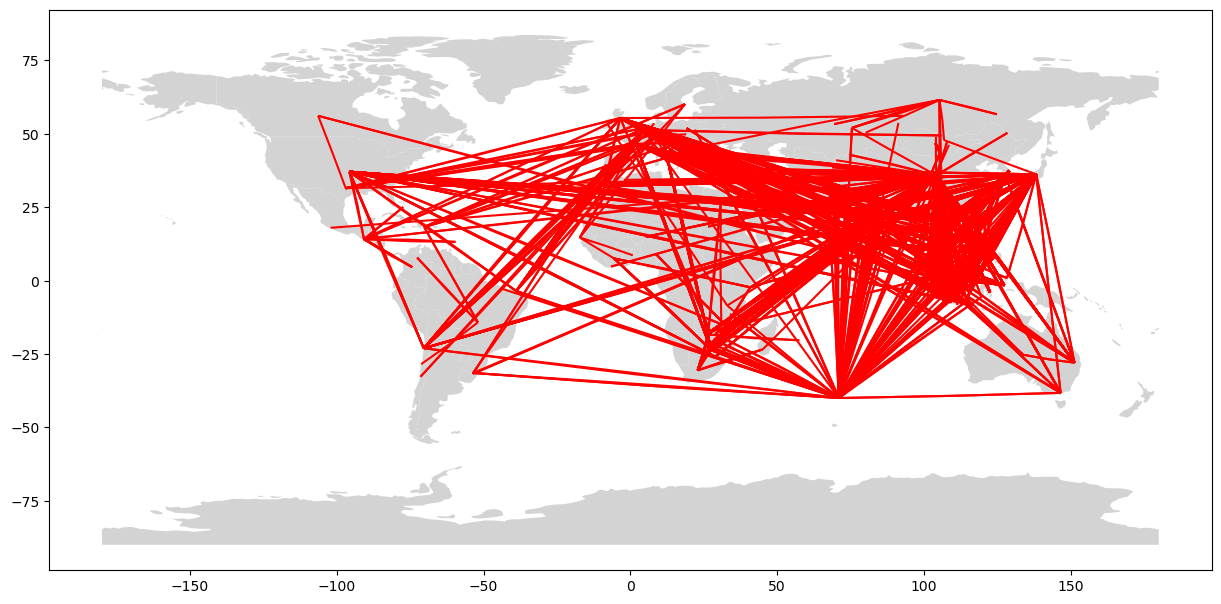

In [88]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray')
gdf_line.plot(ax=ax, color='red', marker='o', markersize=50)

# Show the plot
plt.show()

/var/folders/70/9xc3s63n0j9crf3st7fc61cm0000gn/T/ipykernel_6432/3081215547.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


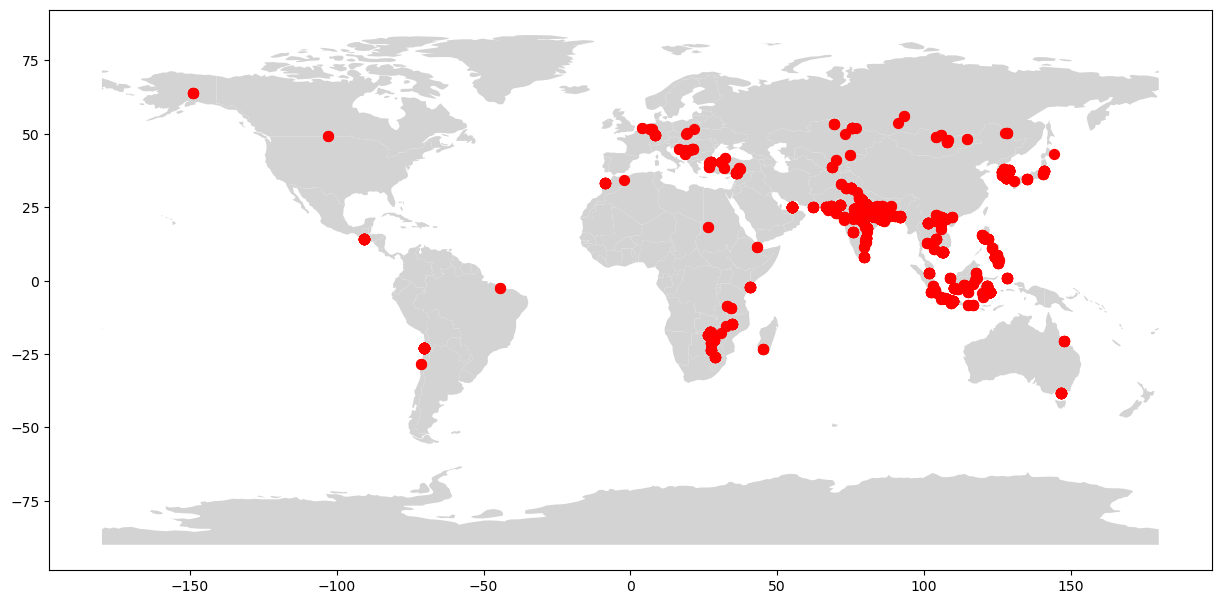

In [89]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray')
gdf_point.plot(ax=ax, color='red', marker='o', markersize=50)

# Show the plot
plt.show()

In [90]:
gdf_coal_fin = pd.concat([gdf_point, gdf_line], ignore_index=True)

In [91]:
gdf_coal_fin
# print to file json for EG
# which geo col to use, geo or arc line..

,tid,country,unit,unitname,target,region,subregion,fin-status,project-name,wiki,...,epc,dollars,source,sponsor,source-iso,target-country-lat,target-country-lng,target-country,Financier Country,geometry
0,G100000107820,India,Unit 1,Adani Godda power station Unit 1,Adani Godda power station,Asia,Southern Asia,closed,Adani Godda power station Unit 1,https://www.gem.wiki/Adani_Godda_power_station,...,SEPCO-3,350000000.0,India,,,24.814107,87.135465,India,India,POINT (91.32308 53.71913)
1,G100000107821,India,Unit 2,Adani Godda power station Unit 2,Adani Godda power station,Asia,Southern Asia,closed,Adani Godda power station Unit 2,https://www.gem.wiki/Adani_Godda_power_station,...,SEPCO-3,350000000.0,India,,,24.814107,87.135465,India,India,POINT (87.13546 24.81411)
2,G100000107820,India,Unit 1,Adani Godda power station Unit 1,Adani Godda power station,Asia,Southern Asia,closed,Adani Godda power station Unit 1,https://www.gem.wiki/Adani_Godda_power_station,...,SEPCO-3,350000000.0,India,,,24.814107,87.135465,India,India,POINT (87.13546 24.81411)
3,G100000107821,India,Unit 2,Adani Godda power station Unit 2,Adani Godda power station,Asia,Southern Asia,closed,Adani Godda power station Unit 2,https://www.gem.wiki/Adani_Godda_power_station,...,SEPCO-3,350000000.0,India,,,24.814107,87.135465,India,India,POINT (87.13546 24.81411)
4,G100000100034,India,Unit 1,Adani Raigarh Thermal Power Plant Unit 1,Adani Raigarh Thermal Power Plant,Asia,Southern Asia,closed,Adani Raigarh Thermal Power Plant Unit 1,https://www.gem.wiki/Adani_Raigarh_Thermal_Pow...,...,,,India,,,21.743775,83.274093,India,India,POINT (87.13546 24.81411)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550,G100000114322,Indonesia,Unit 5,Xinxing Ductile Iron Pipes power station Unit 5,Xinxing Ductile Iron Pipes power station,Asia,South-eastern Asia,closed,Xinxing Ductile Iron Pipes power station Unit 5,https://www.gem.wiki/Xinxing_Ductile_Iron_Pipe...,...,,,China,,,-1.530514,127.418975,Indonesia,China,"LINESTRING (104.19540 35.86170, 115.88111 17.1..."
4551,G100001000232,Indonesia,--,Xinyi Group captive power station --,Xinyi Group captive power station,Asia,South-eastern Asia,financing,Xinyi Group captive power station --,https://www.gem.wiki/Xinyi_Group_captive_power...,...,,,China,,,0.860080,104.180100,Indonesia,China,"LINESTRING (104.19540 35.86170, 104.06365 18.3..."
4552,G100000111500,Türkiye,Unit 1,Yunus Emre power station Unit 1,Yunus Emre power station,Asia,Western Asia,closed,Yunus Emre power station Unit 1,https://www.gem.wiki/Yunus_Emre_power_station,...,Viktovice Power Engineering,266645324.5,Czech Republic,,,39.984309,31.635639,Türkiye,Czech Republic,"LINESTRING (15.47300 49.81750, 23.75633 45.041..."
4553,G100000111501,Türkiye,Unit 2,Yunus Emre power station Unit 2,Yunus Emre power station,Asia,Western Asia,closed,Yunus Emre power station Unit 2,https://www.gem.wiki/Yunus_Emre_power_station,...,Viktovice Power Engineering,266645324.5,Czech Republic,,,39.984309,31.635639,Türkiye,Czech Republic,"LINESTRING (15.47300 49.81750, 23.43212 44.675..."


In [92]:
output_file = f'output/coal-finance-eg-map {iso_today_date}.geojson'
gdf_coal_fin.to_file(output_file, driver='GeoJSON', encoding='utf-8')

print(f'done {output_file}')

done output/coal-finance-eg-map 2024-10-29.geojson


/Users/gem-tah/anaconda3/lib/python3.11/site-packages/pyogrio/raw.py:505: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(


In [93]:
df.reset_index()

,index,tid,country,unit,unitname,target,region,subregion,fin-status,project-name,...,close-year,epc,dollars,source,sponsor,source-iso,target-country-lat,target-country-lng,target-country,Financier Country
0,0,G100000100007,Russia,Unit 4,Abakan power station Unit 4,Abakan power station,Europe,Eastern Europe,closed,Abakan power station Unit 4,...,2012,,123106304.0,Not found,,,53.719130,91.323080,Russia,Not found
1,1,G100000107820,India,Unit 1,Adani Godda power station Unit 1,Adani Godda power station,Asia,Southern Asia,closed,Adani Godda power station Unit 1,...,2019,SEPCO-3,101500000.0,Not found,,,24.814107,87.135465,India,Not found
2,2,G100000107821,India,Unit 2,Adani Godda power station Unit 2,Adani Godda power station,Asia,Southern Asia,closed,Adani Godda power station Unit 2,...,2019,SEPCO-3,101500000.0,Not found,,,24.814107,87.135465,India,Not found
3,3,G100000107820,India,Unit 1,Adani Godda power station Unit 1,Adani Godda power station,Asia,Southern Asia,closed,Adani Godda power station Unit 1,...,2019,SEPCO-3,350000000.0,India,,,24.814107,87.135465,India,India
4,4,G100000107821,India,Unit 2,Adani Godda power station Unit 2,Adani Godda power station,Asia,Southern Asia,closed,Adani Godda power station Unit 2,...,2019,SEPCO-3,350000000.0,India,,,24.814107,87.135465,India,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4694,4694,G100000111556,Türkiye,Phase 3 Unit 2,ZETES power stations Phase 3 Unit 2,ZETES power stations,Asia,Western Asia,closed,ZETES power stations Phase 3 Unit 2,...,2013,,125000000.0,Türkiye,,,41.513760,31.909218,Türkiye,Türkiye
4695,4695,G100000111555,Türkiye,Phase 3 Unit 1,ZETES power stations Phase 3 Unit 1,ZETES power stations,Asia,Western Asia,closed,ZETES power stations Phase 3 Unit 1,...,2013,,200000000.0,Türkiye,,,41.513760,31.909218,Türkiye,Türkiye
4696,4696,G100000111556,Türkiye,Phase 3 Unit 2,ZETES power stations Phase 3 Unit 2,ZETES power stations,Asia,Western Asia,closed,ZETES power stations Phase 3 Unit 2,...,2013,,200000000.0,Türkiye,,,41.513760,31.909218,Türkiye,Türkiye
4697,4697,G100000111555,Türkiye,Phase 3 Unit 1,ZETES power stations Phase 3 Unit 1,ZETES power stations,Asia,Western Asia,closed,ZETES power stations Phase 3 Unit 1,...,2013,,200000000.0,Türkiye,,,41.513760,31.909218,Türkiye,Türkiye


In [94]:
df.columns.to_list()

['tid',
 'country',
 'unit',
 'unitname',
 'target',
 'region',
 'subregion',
 'fin-status',
 'project-name',
 'wiki',
 'Domestic/International',
 'megawatts',
 'status',
 'target-lat',
 'target-lng',
 'source-lat',
 'source-lng',
 'parent',
 'subnational',
 'financer',
 'financer-type',
 'finance-type',
 'close-year',
 'epc',
 'dollars',
 'source',
 'sponsor',
 'source-iso',
 'target-country-lat',
 'target-country-lng',
 'target-country',
 'Financier Country']

In [95]:
set(df['fin-status'].to_list())

{'closed', 'financing', 'stopped', 'unknown'}

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4699 entries, 0 to 4698
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tid                     4699 non-null   object 
 1   country                 4699 non-null   object 
 2   unit                    4699 non-null   object 
 3   unitname                4699 non-null   object 
 4   target                  4699 non-null   object 
 5   region                  4699 non-null   object 
 6   subregion               4699 non-null   object 
 7   fin-status              4699 non-null   object 
 8   project-name            4699 non-null   object 
 9   wiki                    4699 non-null   object 
 10  Domestic/International  4699 non-null   object 
 11  megawatts               4699 non-null   float64
 12  status                  4699 non-null   object 
 13  target-lat              4699 non-null   float64
 14  target-lng              4699 non-null   

In [97]:
# check data against summary
# df['dollars'] = pd.to_numeric(df['dollars'],errors='coerce') 
# df['dollars'] = df['dollars'].fillna('Not found')
# summ1 = df[['target-country', 'fin-status', 'dollars']]
# summ1 = summ1.groupby(['target-country'])['dollars'].sum()


pv_summ1 = df.pivot_table(
    values='dollars',
    index='target-country',
    columns='fin-status',
    aggfunc='sum',
    fill_value='0.0'
)
pv_summ1

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [161]:
pv_summ5 = df.pivot_table(
    values='dollars',
    index='subregion',
    columns='fin-status',
    aggfunc='sum',
    fill_value='0.0'
)
pv_summ5

fin-status,closed,financing,stopped
subregion,,,
Australia and New Zealand,7.626470e+08,0.0,0.0
Central Asia,2.485600e+09,0.0,0.0
Eastern Asia,2.930921e+10,1484750000.0,0.0
Eastern Europe,3.283690e+09,329650000.0,0.0
Latin America and the Caribbean,1.084261e+10,710076604.0,656000000.0
Northern Africa,4.335370e+09,0.0,0.0
Northern America,5.322730e+09,0.0,0.0
South-eastern Asia,9.639649e+10,5347707603.0,6152664816.0
Southern Asia,1.314132e+11,14441310000.0,3187000000.0


In [155]:
# import file DONE
# get it into the shape we need for greeninfo DONE
# get centroids for financer country mapping DONE
# fill in for empty financer country DONE
# if domestic take from coal DONE
# if blank use unknown coordinate DONE
# get line data for arcs for EG DONE
# see if missing data country, capacity DONE
# build toggle so two maps one on capacity one on dollar

# EG To do, what if we assigned unique financiers id, display on that, sum their money and mw for all projects
# then when click, the projects and units show up as units of the financier 
# gmet kinda
# financier is shown as dots large
# but then the arc is also used to conect to each coal project dot, diff color, but also sized by capacity and dollars
# filter on financier and coal projects 
# show even domestic with line but within country from centroid to actual HQ
# on pop up of line get coal info as if it were the dot, no actual dots needed tho
# only dots for financers or maybe add in coal plant but what should be scalled the line or the coal plant dot? 
# each needs to have id financier on it, will it be displayed tho

# filters: finance type, institution, close year, status, dom international